# Fully Connected NN

In [2]:
# Import functions
import setGPU0
from io_functions import *
from draw_functions import *

Couldn't import dot_parser, loading of dot files will not be possible.
using

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


 gpu0


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

In [3]:
# Get the datasets for the first time
#signal = get_dataset('/data/vlimant/LCD/Gamma100GeV')
#bkg = get_dataset('/data/vlimant/LCD/Pi0100GeV')

# Save the datasets for faster future loading
#save_dataset("/data/vlimant/LCD/Gamma100GeV", signal)
#save_dataset("/data/vlimant/LCD/Pi0100GeV", bkg)

In [4]:
# Load the datasets
#signal = load_dataset("/data/vlimant/LCD/Gamma100GeV")
#bkg = load_dataset("/data/vlimant/LCD/Pi0100GeV")

## Prepare the data

In [5]:
# 1 is signal; 0 is background
train_data, test_data, train_labels, test_labels = train_test(shape=(10000,), split=0.33)

## Create and train the model

In [6]:
# Construct and compile a network
model = Sequential()
model.add(Dense(10, input_dim=10000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [23]:
# Train the network
my_fit = model.fit(train_data, train_labels, nb_epoch=10, batch_size=100, verbose=1)

Epoch 1/10
54236/54236 [==============================] - 2s - loss: 0.6087     
Epoch 2/10
54236/54236 [==============================] - 2s - loss: 0.5945     
Epoch 3/10
54236/54236 [==============================] - 2s - loss: 0.5820     
Epoch 4/10
54236/54236 [==============================] - 2s - loss: 0.5687     
Epoch 5/10
54236/54236 [==============================] - 2s - loss: 0.5557     
Epoch 6/10
54236/54236 [==============================] - 2s - loss: 0.5433     
Epoch 7/10
54236/54236 [==============================] - 2s - loss: 0.5321     
Epoch 8/10
54236/54236 [==============================] - 2s - loss: 0.5230     
Epoch 9/10
54236/54236 [==============================] - 2s - loss: 0.5154     
Epoch 10/10
54236/54236 [==============================] - 2s - loss: 0.5079     


In [19]:
# Construct and compile a network
bmodel = Sequential()
bmodel.add(Dense(30, input_dim=10000, activation='sigmoid'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(30, activation='sigmoid'))
bmodel.add(Dropout(0.5))
bmodel.add(Dense(1, init='uniform', activation='sigmoid'))
bmodel.compile(loss='binary_crossentropy', optimizer='sgd')

In [27]:
my_bfit = bmodel.fit(train_data, train_labels, nb_epoch=100, batch_size=100, verbose=1)

Epoch 1/100
54236/54236 [==============================] - 2s - loss: 0.3662     
Epoch 2/100
54236/54236 [==============================] - 2s - loss: 0.3597     
Epoch 3/100
54236/54236 [==============================] - 2s - loss: 0.3558     
Epoch 4/100
54236/54236 [==============================] - 2s - loss: 0.3521     
Epoch 5/100
54236/54236 [==============================] - 2s - loss: 0.3513     
Epoch 6/100
54236/54236 [==============================] - 2s - loss: 0.3478     
Epoch 7/100
54236/54236 [==============================] - 2s - loss: 0.3482     
Epoch 8/100
54236/54236 [==============================] - 2s - loss: 0.3421     
Epoch 9/100
54236/54236 [==============================] - 2s - loss: 0.3409     
Epoch 10/100
54236/54236 [==============================] - 2s - loss: 0.3367     
Epoch 11/100
54236/54236 [==============================] - 2s - loss: 0.3362     
Epoch 12/100
54236/54236 [==============================] - 2s - loss: 0.3347     
Epoch 13/100


## Visualize the classification

### Classification Histogram

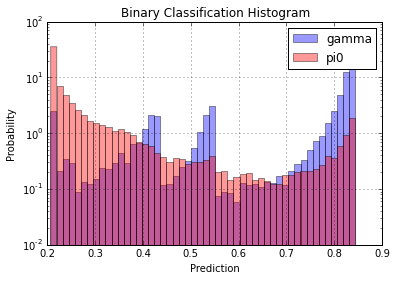

In [25]:
# Draw the classification histogram
draw_histogram(train_data, train_labels, model)

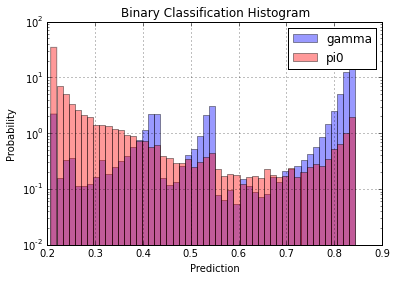

In [28]:
draw_histogram(test_data, test_labels, model)

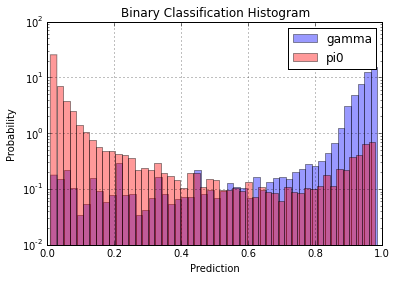

In [34]:
draw_histogram(test_data, test_labels, bmodel)

### ROC Curve

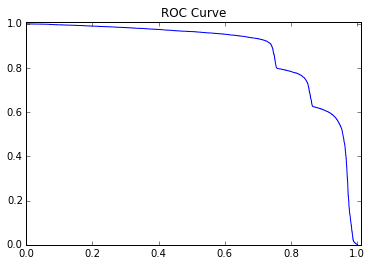

In [14]:
# Draw the roc curve
draw_roc_curve(test_data, test_labels, model)

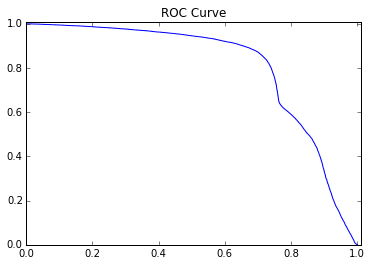

In [11]:
draw_roc_curve(train_data, train_labels, model)

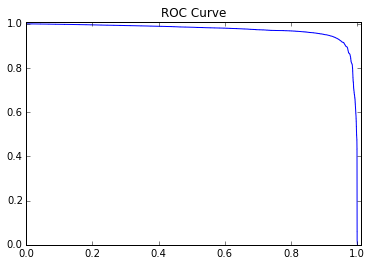

In [33]:
draw_roc_curve(train_data, train_labels, bmodel)

### Loss Evolution

In [32]:
bmodel.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_7 (Dense)                    (None, 30)          300030      dense_input_3[0][0]              
____________________________________________________________________________________________________
dropout_5 (Dropout)                (None, 30)          0           dense_7[0][0]                    
____________________________________________________________________________________________________
dense_8 (Dense)                    (None, 30)          930         dropout_5[0][0]                  
____________________________________________________________________________________________________
dropout_6 (Dropout)                (None, 30)          0           dense_8[0][0]                    
___________________________________________________________________________________________

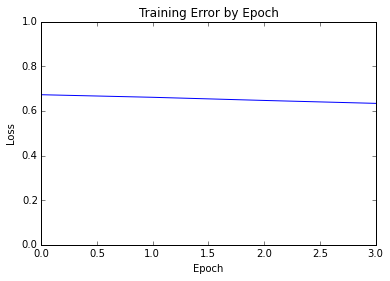

In [17]:
# Draw the loss history
draw_loss_history(my_fit)

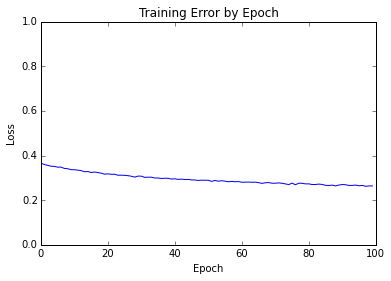

In [36]:
draw_loss_history(my_bfit)